# IS 4487 Assignment 6: Data Cleaning with Airbnb Listings

In this assignment, you will:
- Load a raw Airbnb listings dataset
- Identify and resolve missing or inconsistent data
- Decide what data to drop, keep, or clean
- Save a clean dataset to use in Assignment 7

## Why This Matters

Data cleaning is one of the most important steps in any analysis — but it's often the least visible. Airbnb hosts, managers, and policy teams rely on clean data to make decisions. This assignment gives you experience cleaning raw data and justifying your choices so others can understand your process.

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Assignments/assignment_06_data_cleaning.ipynb" target="_parent">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>



## Dataset Description

The dataset you'll be using is a **detailed Airbnb listing file**, available from [Inside Airbnb](https://insideairbnb.com/get-the-data/).

Each row represents one property listing. The columns include:

- **Host attributes** (e.g., host ID, host name, host response time)
- **Listing details** (e.g., price, room type, minimum nights, availability)
- **Location data** (e.g., neighborhood, latitude/longitude)
- **Property characteristics** (e.g., number of bedrooms, amenities, accommodates)
- **Calendar/booking variables** (e.g., last review date, number of reviews)

📌 The schema is consistent across cities, so you can expect similar columns regardless of the location you choose.


## 1. Choose a City & Upload Your Dataset

📥 Follow these steps:

1. Go to: [https://insideairbnb.com/get-the-data/](https://insideairbnb.com/get-the-data/)
2. Choose a city you’re interested in.
3. Download the file named: **`listings.csv.gz`** under that city.
4. In your notebook:
   - Open the left sidebar
   - Click the folder icon 📁
   - Click the upload icon ⬆️ and choose your `listings.csv.gz` file
5. Use the file path `/content/listings.csv.gz` when loading your data.
6. Import standard libraries (`pandas`, `numpy`, `seaborn`, `matplotlib`)


In [16]:
# Import necessary libraries 🔧
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
# Load your uploaded file (path "/content/listings.csv.gz") 🔧
df = pd.read_csv('/content/listings.csv.gz')

## 2. Explore Missing Values

Business framing:

Stakeholders don’t like surprises in the data. Missing values can break dashboards, confuse pricing models, or create blind spots for host managers.

Explore how complete your dataset is:
- Count the null values of each column
- Create visuals (e.g. heatmaps, boxplots, bar charts, etc) to help show what columns are missing values
- Keep in mind which column(s) are missing too much data, you will delete these in the next step

### In your markdown:
1. What are the top 3 columns with the most missing values?
2. Which ones are likely to create business issues?
3. Which could be safely ignored or dropped?



In [18]:
# Add code here 🔧
count_null = df.isnull().sum()
print(count_null)

id                                               0
listing_url                                      0
scrape_id                                        0
last_scraped                                     0
source                                           0
                                                ..
calculated_host_listings_count                   0
calculated_host_listings_count_entire_homes      0
calculated_host_listings_count_private_rooms     0
calculated_host_listings_count_shared_rooms      0
reviews_per_month                               68
Length: 79, dtype: int64


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459 entries, 0 to 458
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            459 non-null    int64  
 1   listing_url                                   459 non-null    object 
 2   scrape_id                                     459 non-null    int64  
 3   last_scraped                                  459 non-null    object 
 4   source                                        459 non-null    object 
 5   name                                          459 non-null    object 
 6   description                                   449 non-null    object 
 7   neighborhood_overview                         196 non-null    object 
 8   picture_url                                   459 non-null    object 
 9   host_id                                       459 non-null    int

In [20]:
null_counts = df.isnull().sum()
null_counts = null_counts[null_counts > 0]
null_counts_sorted = null_counts.sort_values(ascending=False)
print(null_counts_sorted)

neighbourhood_group_cleansed    459
license                         459
calendar_updated                459
neighbourhood                   263
neighborhood_overview           263
host_about                      208
host_location                   114
host_neighbourhood               70
review_scores_accuracy           68
review_scores_rating             68
last_review                      68
review_scores_checkin            68
review_scores_cleanliness        68
review_scores_communication      68
review_scores_location           68
review_scores_value              68
reviews_per_month                68
first_review                     68
price                            40
bathrooms                        40
estimated_revenue_l365d          40
beds                             40
host_response_rate               28
host_response_time               28
host_acceptance_rate             13
description                      10
has_availability                  8
host_is_superhost           

<Axes: >

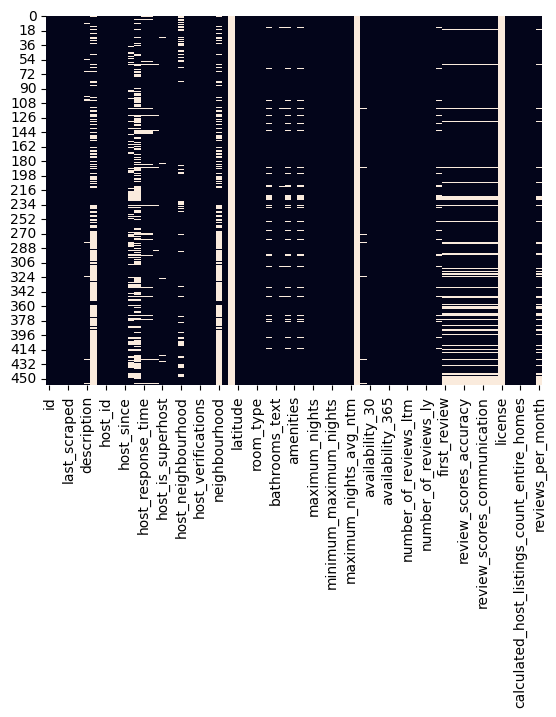

In [21]:
sns.heatmap(df.isnull(), cbar=False)

### ✍️ Your Response: 🔧
1. The columns with the most null values are license with 459, calendar_updated with 459, and neighbourhood with 263.

2. The ones that are likely to create business issues are license and neighbourhood. License will affect business issues the most if it is necessary to have a permit/license for Airbnb. However, the fact that all 459 columns don't have one could mean that it is not required. If it is, it would cause them to face legal issues. Also,for the neighbourhood variable, consumers want to know what neighborhood the airbnb is, as that is a consideriation when picking where to stay. Same with neighbourhood_overview.

3. If an Airbnb license isn't necessary, then that can be dropped. Calender_updated can dropped as well since all of the variables don't have that.


## 3. Drop Columns That Aren’t Useful

Business framing:  

Not every column adds value. Analysts often remove columns that are too empty, irrelevant, or repetitive — especially when preparing data for others.

Make a decision:

- Choose 2–4 columns to drop from your dataset
- Document your reasons for each one
- Confirm they're gone with `.head()` or `.info()`

### In Your Response:
1. Which columns did you drop?
2. Why were they not useful from a business perspective?
3. What could go wrong if you left them in?



In [22]:
# Add code here 🔧
df = df.drop(columns=['license', 'calendar_updated'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459 entries, 0 to 458
Data columns (total 77 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            459 non-null    int64  
 1   listing_url                                   459 non-null    object 
 2   scrape_id                                     459 non-null    int64  
 3   last_scraped                                  459 non-null    object 
 4   source                                        459 non-null    object 
 5   name                                          459 non-null    object 
 6   description                                   449 non-null    object 
 7   neighborhood_overview                         196 non-null    object 
 8   picture_url                                   459 non-null    object 
 9   host_id                                       459 non-null    int

### ✍️ Your Response: 🔧
1. The columns I dropped where license and calender_updated.

2. Both the license and calender_updated columns were not useful because they were absent for all the variables, so did not affect the data or the end-result in any way. Keeping track of that data is a waste of resources.

3. If they were kept in, they could skew the data and give faulty results.



## 4. Fill or Fix Values in Key Columns

Business framing:  

Let’s say your manager wants to see a map of listings with prices and review scores. If key fields are blank, the map won’t work. But not all missing values should be filled the same way.

- Choose 2 columns with missing values
- Use a strategy to fill or flag those values
  - (e.g., median, “unknown”, forward-fill, or a placeholder)
- Explain what you did and why

### In your response:
1. What two columns did you clean?
2. What method did you use for each, and why?
3. What risks are there in how you filled the data?

In [23]:
# Your code for converting column data types 🔧
df.fillna({'review_scores_rating': 0}, inplace=True)
df['null_price_values'] = df['price'].isnull().astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459 entries, 0 to 458
Data columns (total 78 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            459 non-null    int64  
 1   listing_url                                   459 non-null    object 
 2   scrape_id                                     459 non-null    int64  
 3   last_scraped                                  459 non-null    object 
 4   source                                        459 non-null    object 
 5   name                                          459 non-null    object 
 6   description                                   449 non-null    object 
 7   neighborhood_overview                         196 non-null    object 
 8   picture_url                                   459 non-null    object 
 9   host_id                                       459 non-null    int

### ✍️ Your Response: 🔧
1. I cleaned the review_scores_rating and price.

2. For review_scores_rating, I filled the null values with a placeholder. It can't be predicted using the fill or median methods because reviews cna be subjective. I picked a 0 because the lowest you can go for a rating is 1, so these placeholders can be easiily identified and disregarded. For price, I made a different variable that flagged null values. I did this because a placeholder might skew the data, and the prices don't have previous data to base them accurately off of.

3. A risk of filling the null values with a placeholder is that if a regression analysis is done without excluding the null values then it can skew the results. The risk of flagging the null alues is that if the flag isn't adressed then the price column can skew the data.


## 5. Convert and Clean Data Types

Business framing:  

Sometimes columns that look like numbers are actually stored as text — which breaks calculations and slows down analysis. Common examples are price columns with dollar signs or availability stored as strings.

- Identify one column with the wrong data type
- Clean and convert it into a usable format (e.g., from string to number)
- Check your work by summarizing or plotting the cleaned column

### In Your Response: :
1. What column did you fix?
2. What cleaning steps did you apply?
3. How does this help prepare the data for later use?


In [24]:
# Clean or adjust your dataset 🔧
df['price'] = df['price'].str.replace('$', '').str.replace(',', '').astype(float)
print(df['price'])
df['price'].describe()

0       70.0
1      104.0
2       75.0
3      101.0
4      110.0
       ...  
454     72.0
455    224.0
456    238.0
457    313.0
458     58.0
Name: price, Length: 459, dtype: float64


,price
count,419.000000
mean,118.119332
std,100.619541
min,24.000000
25%,70.500000
50%,95.000000
75%,127.000000
max,1050.000000


### ✍️ Your Response: 🔧
1. The column that I fixed was price.

2. The cleaning step I applied was changing the the data type to a float. I removed commas and dollar signs, then changed the values to a float because price is a continuous and can have cents.

3. It prepares the data for later because it allows for regression and/or correlation analysis, allowing use to better predict a very important variable in a way that is most accurate and applicable.

## 6. Remove Duplicate Records

Business framing:  

If a listing appears twice, it could inflate revenue estimates or confuse users. Airbnb needs each listing to be unique and accurate.

- Check for rows that are exact duplicates
- If your data has an ID column and each ID is supposed to unique, then make sure there are no duplicate IDs
- Remove duplicates if found

### In your markdown:
1. Did you find duplicates?
2. How did you decide what to drop or keep?
3. Why are duplicates risky for Airbnb teams?


In [25]:
# Add code here 🔧
print(f"Duplicate Rows: {df.duplicated().sum()}")
print(f"Duplicate ID's: {df.duplicated(subset=['id']).sum()}")
print(f"Duplicate Host Id's: {df.duplicated(subset=['host_id']).sum()}")
print(f"Duplicate Host Id's with the same URL: {df.duplicated(subset=['host_id', 'listing_url']).sum()}")

Duplicate Rows: 0
Duplicate ID's: 0
Duplicate Host Id's: 267
Duplicate Host Id's with the same URL: 0


### ✍️ Your Response: 🔧 🔧
1. Yes, 267 Duplicate Host Id's.

2. I kept all of the Host Id's because hosts can have multiple properties. After so cross-checking with listings, there were no duplicates.

3. Duplicates are risky because they can skew the data.

## 7. Export Cleaned Data

Before wrapping up, export your cleaned Airbnb dataset to a CSV file. You'll need this file for **Assignment 7**, where you'll perform data transformation techniques.

Make sure your data has:
- Cleaned and consistent column values
- Proper data types for each column
- Any unnecessary columns removed

This file should be the version of your dataset that you’d feel confident sharing with a teammate or using for deeper analysis.



```
# Explanation:
# - "cleaned_airbnb_data.csv" is the name of the file that will be saved
# - index=False prevents pandas from writing row numbers into the CSV
# - The file will be saved to your working directory (in Colab, you'll need to download it manually. Once you see the data in your files tab, just click on the three dots, then click “download”)
# - YOU MAY NEED TO PRESS “RUN” MULTIPLE TIMES IN ORDER FOR IT TO SHOW UP
# - FOR SOME DEVICES, IT MAY TAKE A FEW MINUTES BEFORE YOUR FILE SHOWS UP

```





In [26]:
# export csv here 🔧
df = df.drop(columns=['scrape_id', 'source', 'last_scraped', 'host_thumbnail_url'])
df['first_review'] = pd.to_datetime(df['first_review'])
df['last_review'] = pd.to_datetime(df['last_review'])
df['host_since'] = pd.to_datetime(df['host_since'])
host_response_rate = df['host_response_rate'].str.rstrip('%').astype('float') / 100.0
df['host_response_rate'] = host_response_rate
host_acceptance_rate = df['host_acceptance_rate'].str.rstrip('%').astype('float') / 100.0
df['host_acceptance_rate'] = host_acceptance_rate
host_listings_count = df['host_listings_count'].astype('Int64')
df['host_listings_count'] = host_listings_count
host_total_listings_count = df['host_total_listings_count'].astype('Int64')
df['host_total_listings_count'] = host_total_listings_count
bedrooms = df['bedrooms'].astype('Int64')
df['bedrooms'] = bedrooms
beds = df['beds'].astype('Int64')
df['beds'] = beds
df.to_csv('cleaned_airbnb_data.csv', index=False)

## 8. Final Reflection

You’ve just cleaned a real-world Airbnb dataset — the kind of work that happens every day in analyst and data science roles.

Before you move on to data transformation in Assignment 7, take a few moments to reflect on the decisions you made and what you learned.

### In your markdown:
1. What was the most surprising or challenging part of cleaning this dataset?
2. How did you decide which data to drop, fix, or keep?
3. What’s one way a business team (e.g., hosts, pricing analysts, platform ops) might benefit from the cleaned version of this data?
4. If you had more time, what would you explore or clean further?
5. How does this relate to your customized learning outcome you created in canvas?


Write your response clearly in full sentences. No more than a few sentences required per response.


### ✍️ Your Response: 🔧

1. The most challenging/surprising part of cleaning the dataset is the fact that there were so many null values. There were a couple columns with no values at all. Perhaps in other cities they are necessary or utilized, but in this case they weren't.
2. They way I decided what to drop was to look at what wouldn't affect the outcome. For example, the thumbnail for the host wouldn't affect the price of the home, so I got rid of it. I decided what to fix based on what could affect teh price, but would be more meaningful. For example, first_review, last_review, and host_since I changed to dates, because it made more sense. I decided to keep the license variable because if we were to use this model for another city, in case they need a license, that variable would be useful.
3. A business team would be able to benefit from the cleaned data by more accurately being able to predict home prices, and find out which variables affect it the most. This will help tnem understand which variables need to be prioritized for the hosts to make sure they have, in order to increase customer bookings.
4. If I had more time, I would probably test to see whether some other variables had that much of an impact, like host_name. Another couple of variables that would be interesting to see is the longitude and latitude variables. I don't see how consumers would use those, as they would rather use addresses. So, those could be considered to drop.
5. This relates to my customized learning outcomes, specifically "Strategic Operations Decision-Making Through Analytics" because data cleaning allows for making machine learning models to create sttageic operations. Using data analytics and modelling, I can know what affects pricing, and where to focus attention strategically.


## Submission Instructions
✅ Checklist:
- All code cells run without error
- All markdown responses are complete
- Submit on Canvas as instructed

In [28]:
!jupyter nbconvert --to html "assignment_06_AndradeLeslie.ipynb"

[NbConvertApp] Converting notebook assignment_06_AndradeLeslie.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 1 image(s).
[NbConvertApp] Writing 440504 bytes to assignment_06_AndradeLeslie.html
